In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
#import dataset
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 8)

In [4]:
# Kiểm tra null
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
# loại dữ liệu của features
df.dtypes # datatypes

carat      float64
cut         object
color       object
clarity     object
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
#import LabelEncoder để chuyển giá trị chuỗi thành giá trị số
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features = ["cut", "color", "clarity"]

for col in features:
    df[col] = le.fit_transform(df[col])

df.tail()

,carat,cut,color,clarity,price,x,y,z
53935,0.72,2,0,2,2757,5.75,5.76,3.50
53936,0.72,1,0,2,2757,5.69,5.75,3.61
53937,0.70,4,0,2,3295,5.66,5.68,3.56
53938,0.86,3,4,3,3578,6.15,6.12,3.74
53939,0.75,2,0,3,2757,5.83,5.87,3.64


In [7]:
X=df.drop(['price'],axis=1)
y=df['price']

In [8]:
# spiliting the dataset test_size=0.4
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [9]:
from sklearn.tree import DecisionTreeRegressor
# max_depth = 5
model = DecisionTreeRegressor(max_depth= 5, random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [10]:
#lưu model bằng thư viện joblib
import joblib
filename = "model.joblib"
joblib.dump(model, filename)

['model.joblib']

In [11]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

print(f'Model accuracy score is: {r2_score(y_test, y_pred)* 100:.2f}%')

Model accuracy score is: 92.45%


In [12]:
from sklearn.metrics import mean_squared_error
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')

MSE: 1176351.24
RMSE: 1084.60


In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 5).fit(X_train,y_train)

print(f'Model accuracy score is: {rfr.score(X_test, y_test)* 100:.2f}%')
print("RMSE :", np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))

Model accuracy score is: 93.37%
RMSE : 1016.0554997089191


In [14]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

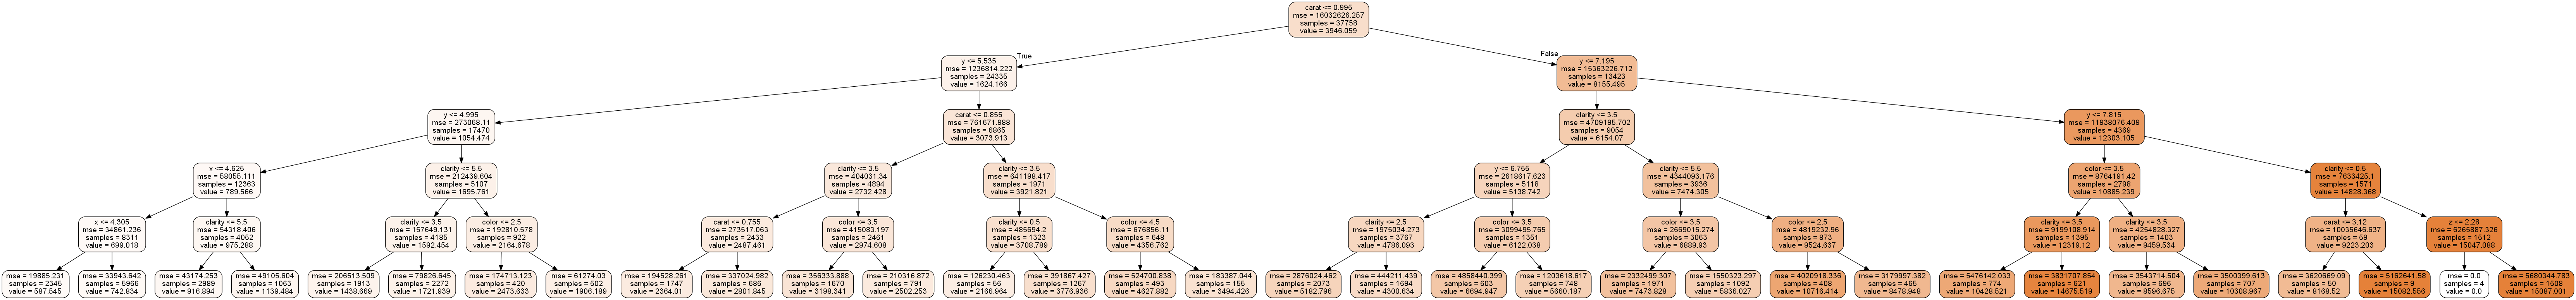

In [15]:
dot_data = StringIO()
export_graphviz(model, out_file= dot_data,
               feature_names=X.columns,
               class_names=y_train,
               filled=True,
               rounded=True
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diamonds.png')
Image(graph.create_png())
